# Pathway loading in Cytoscape

We wish to create an automated Cytoscape workflow using Python and py4cytoscape in Jupyter notebooks

In order to load our pathway from WikiPathways into Cytoscape, we have a select few prerequisites:

- Downloading and starting a new Cytoscape session
- Installing the latest versions of Wikipathways, CyTargetLinker and FileTransfer. 

This can be done via Cytoscape itself by opening Apps > App Manager > Searching for required apps.
- Downloading py4cytoscape

Next, we import the following packages:

In [1]:
import os
import sys
import requests
import pandas as pd
from lxml import etree as ET
from collections import OrderedDict
import py4cytoscape as p4c

## Defining Pathway

Once we have imported the following packages, we can make a variable to which we assign the ID of the pathway we wish to visualise in cytoscape. 

In this case, I have assigned WP5035 from WikiPathways to the variable 'WP'

In [2]:
WP = 'WP5035'

## Loading Pathway in Cytoscape

We now will load the pathway assigned to variable 'WP' in cytoscape by running the following piece of code.

In the variable cmd_list we recall all the commands we wish to run in a systematic way. 

Since we wish to load our pathway as a network, we use the command 'import-as-network'. However, if you wish to import it as a pathway, simply replace it to 'import-as-pathway'


In [3]:
cmd_list = ['wikipathways','import-as-network','id=" ', WP, '"']
cmd = " ".join(cmd_list)
p4c.commands.commands_get(cmd)

[]

## Visualising network in Jupyter Notebook

In order to visualize the output that you get in Cytoscape in the notebook, we need to import IPython and export our network as an image.

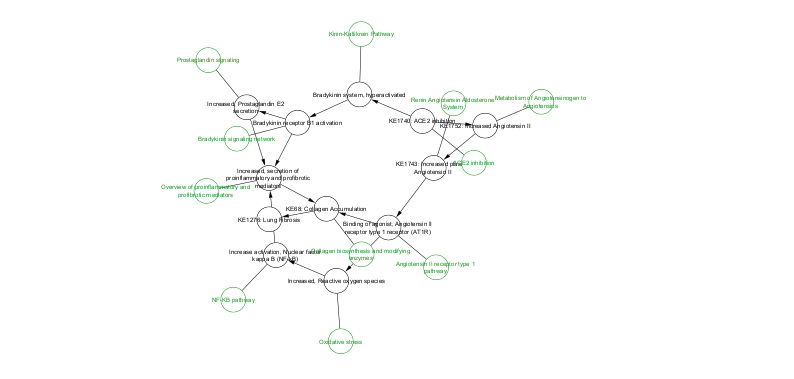

In [4]:
import IPython
p4c.export_image(filename='network.png')
from IPython.display import Image
Image('network.png')

## Network extension

Before we begin to extend our network using the linkset and CyTargetLinker, we have to identify the path where we have stored it.

In [19]:
path = 'C:/Users/Aria Jadhav/Desktop/Biomed Internship/'

linkset = path + 'wikipathways-hsa-20210525-STUDENT.xgmml'

cmd = "".join(['cytargetlinker extend idAttribute="XrefId" linkSetFiles="', linkset, '" network=current direction=TARGETS'])
p4c.commands.commands_get(cmd)

['Extension step: 2',
 'Linkset: WikiPathways-20210512_Homo sapiens_20210512',
 'Added edges: 194',
 'Added nodes: 159']

We can visualize our Cytoscape output by running the same piece of code as before and changing the file name

This file already exists. A Cytoscape popup will be generated to confirm overwrite.


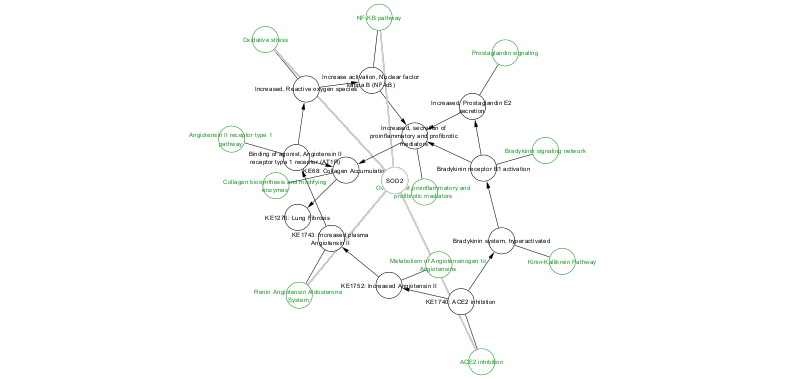

In [21]:
p4c.export_image(filename='extended_network.png')
Image('extended_network.png')

## Loading and Applying Visual Style

To improve the readability of the nodes in the network, we can load a visual style file saved in the path as mentioned before.

In [22]:
vizstyle = path+ "newstyleV1.xml"
LoadStylecmd = "".join(['vizmap load file file="',vizstyle,'"'])
p4c.commands.commands_get(LoadStylecmd)

['Loaded styles:', 'CyTargetLinker_5']

 Next, we can apply this style using the following piece of code

In [23]:
setVisualStyle = 'vizmap apply styles="CyTargetLinker_0"'
p4c.commands.commands_get(setVisualStyle)

['Style applied to views:',
 'CTL_ACE2 inhibition leads to pulmonary fibrosis - Homo sapiens_4 (SUID: 3824)']

In [24]:
p4c.layout_network()

{}

We get the following output after applying the visual style

This file already exists. A Cytoscape popup will be generated to confirm overwrite.


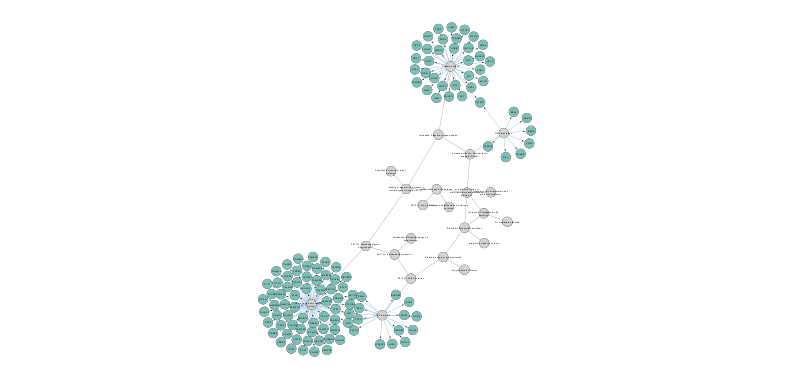

In [25]:
p4c.export_image(filename='extended_net_viz.png')
Image('extended_net_viz.png')

In [26]:
dataExpr = pd.read_csv(r'C:/Users/Aria Jadhav/Downloads/2021-internship-main (1)/2021-internship-main/Marvin/R-data-processing/dataExpr.csv')
dataExpr

,Name,logFC,logCPM,F,PValue,FDR
0,SAA2,2.414265,5.432500,5.120911e+02,1.410000e-12,1.880000e-08
1,CCL20,3.133684,4.949061,4.479182e+02,3.560000e-12,2.380000e-08
2,IL36G,2.722310,4.359048,3.404549e+02,2.360000e-11,1.050000e-07
3,INHBA,1.810556,6.511435,2.727932e+02,1.070000e-10,3.580000e-07
4,TNFAIP3,1.601914,7.418585,2.634266e+02,1.360000e-10,3.630000e-07
...,...,...,...,...,...,...
13345,ZNF490,0.000135,2.994039,6.670000e-07,9.993599e-01,9.995575e-01
13346,NCKAP5L,0.000134,4.886377,6.200000e-07,9.993826e-01,9.995575e-01
13347,FBXO24,-0.000524,-0.670124,5.710000e-07,9.994077e-01,9.995575e-01
13348,IQCD,-0.000026,0.010140,3.570000e-07,9.995316e-01,9.996065e-01


In [27]:
#mapped_cols = p4c.map_table_column('display name', 'Human', 'HGNC', 'Entrez Gene')

p4c.load_table_data(dataExpr, data_key_column="Name")

C:\Users\Aria Jadhav\anaconda3\lib\site-packages\py4cytoscape\tables.py:470: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[col] = col_val


'Success: Data loaded in defaultnode table'

In [28]:
p4c.get_table_column_names('node')

['SUID',
 'shared name',
 'name',
 'selected',
 'GraphID',
 'Type',
 'XrefId',
 'XrefDatasource',
 'Color',
 'Border Width',
 'Node Size',
 'Label Font Size',
 'Ensembl',
 'CTL.Ext',
 'CTL.Type',
 'CTL.PathwayName',
 'CTL.label',
 'CTL.PathwayID',
 'CTL.GeneName',
 'CTL.GeneID',
 'logFC',
 'logCPM',
 'F',
 'PValue',
 'FDR']

# Visualisation

In [29]:
logFC_score_table = p4c.get_table_columns(table='node', columns='logFC')

In [30]:
logFC_score_table.head()

,logFC
4096,0.171512
4609,NaN
4098,-0.0294117
4100,-0.271622
4612,0.48061


In [31]:
logFC_min = logFC_score_table.min().values[0]
logFC_max = logFC_score_table.max().values[0]
logFC_center = logFC_min + (logFC_max - logFC_min)/2
print(logFC_min)
print(logFC_max)
print(logFC_center)

-1.464884841
4.798713519
1.6669143389999999


In [33]:
p4c.set_visual_style('default')
p4c.set_node_color_mapping('logFC', [logFC_min, logFC_center, logFC_max], ['#0000FF', '#FFFFFF', '#FF0000'])

style_name not specified, so updating "default" style.


''

In [35]:
p4c.set_node_color_default('#b5b1b1')

style_name not specified, so updating "default" style.


''

In [58]:
PValue_score_table = p4c.get_table_columns(table='node', columns='PValue')
PValue_min = PValue_score_table.min().values[0]
PValue_max = PValue_score_table.max().values[0]
p4c.set_node_border_width_mapping('PValue', table_column_values=[PValue_min, PValue_max], widths=[30, 5])

style_name not specified, so updating "default" style.


''

In [61]:
Sig_gene = p4c.create_column_filter('Sig_gene', 'PValue', 0.05, "LESS_THAN")

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


In [62]:
#nodes highlighted in yellow on cytoscape
Sig_gene

{'nodes': ['CCL28',
  'GSR',
  'CXCL1',
  'IL23A',
  'NFIX',
  'MMP9',
  'CXCL10',
  'TNF',
  'IL36A',
  'IL1RN',
  'IRF7',
  'PTGES',
  'CXCL16',
  'IL17C',
  'TGFBR2',
  'IL1A',
  'IL1B',
  'SMAD3',
  'ATP6AP2',
  'IL6',
  'CALML3',
  'CALML3',
  'IL36G',
  'CALML3',
  'MAP2K6',
  'CAMK2D',
  'CAMK2D',
  'ITPR3',
  'CXCL5',
  'CTGF',
  'ITPR1',
  'CXCL2',
  'ITPR1',
  'ITPR3',
  'ATF4',
  'CXCL14',
  'IL33',
  'VEGFA',
  'LIF',
  'IL15',
  'CSF3',
  'CSF1',
  'CXCL6',
  'CXCL3',
  'NFKBIA',
  'NFKB1',
  'CSF2',
  'NFKBIE',
  'MMP1',
  'NFE2L2',
  'MAPK10',
  'CCL20',
  'SOD2',
  'GCLC',
  'CAT',
  'MAOA',
  'GPX3',
  'XDH',
  'MT1X'],
 'edges': None}

In [65]:
df = pd.DataFrame(Sig_gene)
df.head()

,nodes,edges
0,CCL28,None
1,GSR,None
2,CXCL1,None
3,IL23A,None
4,NFIX,None


In [73]:
sig_gene_exp_list = df["nodes"].tolist()
print(sig_gene_exp_list)

['CCL28', 'GSR', 'CXCL1', 'IL23A', 'NFIX', 'MMP9', 'CXCL10', 'TNF', 'IL36A', 'IL1RN', 'IRF7', 'PTGES', 'CXCL16', 'IL17C', 'TGFBR2', 'IL1A', 'IL1B', 'SMAD3', 'ATP6AP2', 'IL6', 'CALML3', 'CALML3', 'IL36G', 'CALML3', 'MAP2K6', 'CAMK2D', 'CAMK2D', 'ITPR3', 'CXCL5', 'CTGF', 'ITPR1', 'CXCL2', 'ITPR1', 'ITPR3', 'ATF4', 'CXCL14', 'IL33', 'VEGFA', 'LIF', 'IL15', 'CSF3', 'CSF1', 'CXCL6', 'CXCL3', 'NFKBIA', 'NFKB1', 'CSF2', 'NFKBIE', 'MMP1', 'NFE2L2', 'MAPK10', 'CCL20', 'SOD2', 'GCLC', 'CAT', 'MAOA', 'GPX3', 'XDH', 'MT1X']


In [76]:
p4c.set_node_border_width_bypass(sig_gene_exp_list, 20)
p4c.set_node_border_color_bypass(sig_gene_exp_list, '#FF007F')

In cyrest_put(): Could not parse the input JSON for updating view because: HTTP 404 Not Found


CyError: In cyrest_put(): Could not parse the input JSON for updating view because: HTTP 404 Not Found

In [41]:
p4c.layout_network('force-directed')

{}

In [56]:
p4c.set_node_shape_default('ELLIPSE', style_name='default')
p4c.lock_node_dimensions(True, style_name='default')
p4c.set_node_size_default(50, style_name='default')
p4c.set_node_color_default('#D3D3D3', style_name='default')
p4c.set_node_border_width_default(2, style_name='default')
p4c.set_node_color_default('#b5b1b1', style_name='default')
p4c.set_node_label_mapping('name', style_name='default')
p4c.set_node_font_size_default(14, style_name='default')

''

In [45]:
p4c.export_image('./dataset1', type='JPEG')

This file already exists. A Cytoscape popup will be generated to confirm overwrite.


{'file': 'C:\\Users\\Aria Jadhav\\CytoscapeConfiguration\\filetransfer\\default_sandbox\\dataset1.jpeg'}

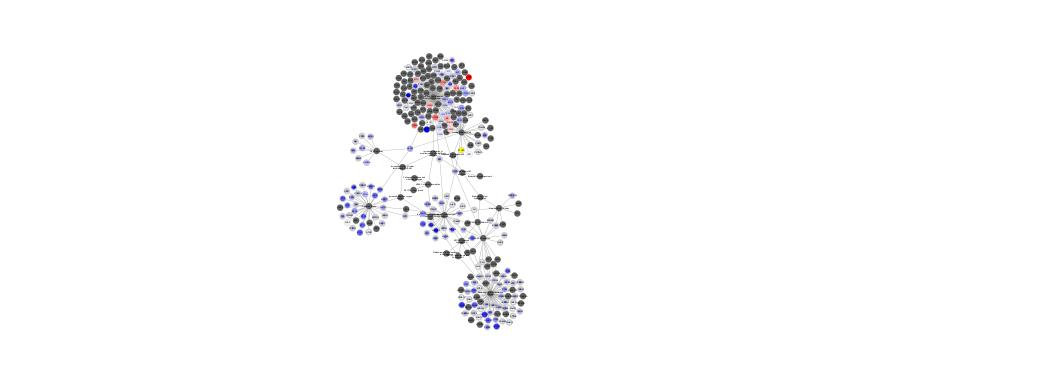